<a href="https://colab.research.google.com/github/tzoung-yu/TrueVolume/blob/main/(V)MACD%2BTrueVolume%E4%B8%8A%E5%B8%82%E4%B8%8A%E6%AB%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start to update codes
Done!
2388 威盛 上市 半導體業
統計起始日:2023/05/10
[*********************100%%**********************]  1 of 1 completed
2023-11-24
 165.0
MACD 月: >0 週: >0 日: >0
balanced macd: 3.34


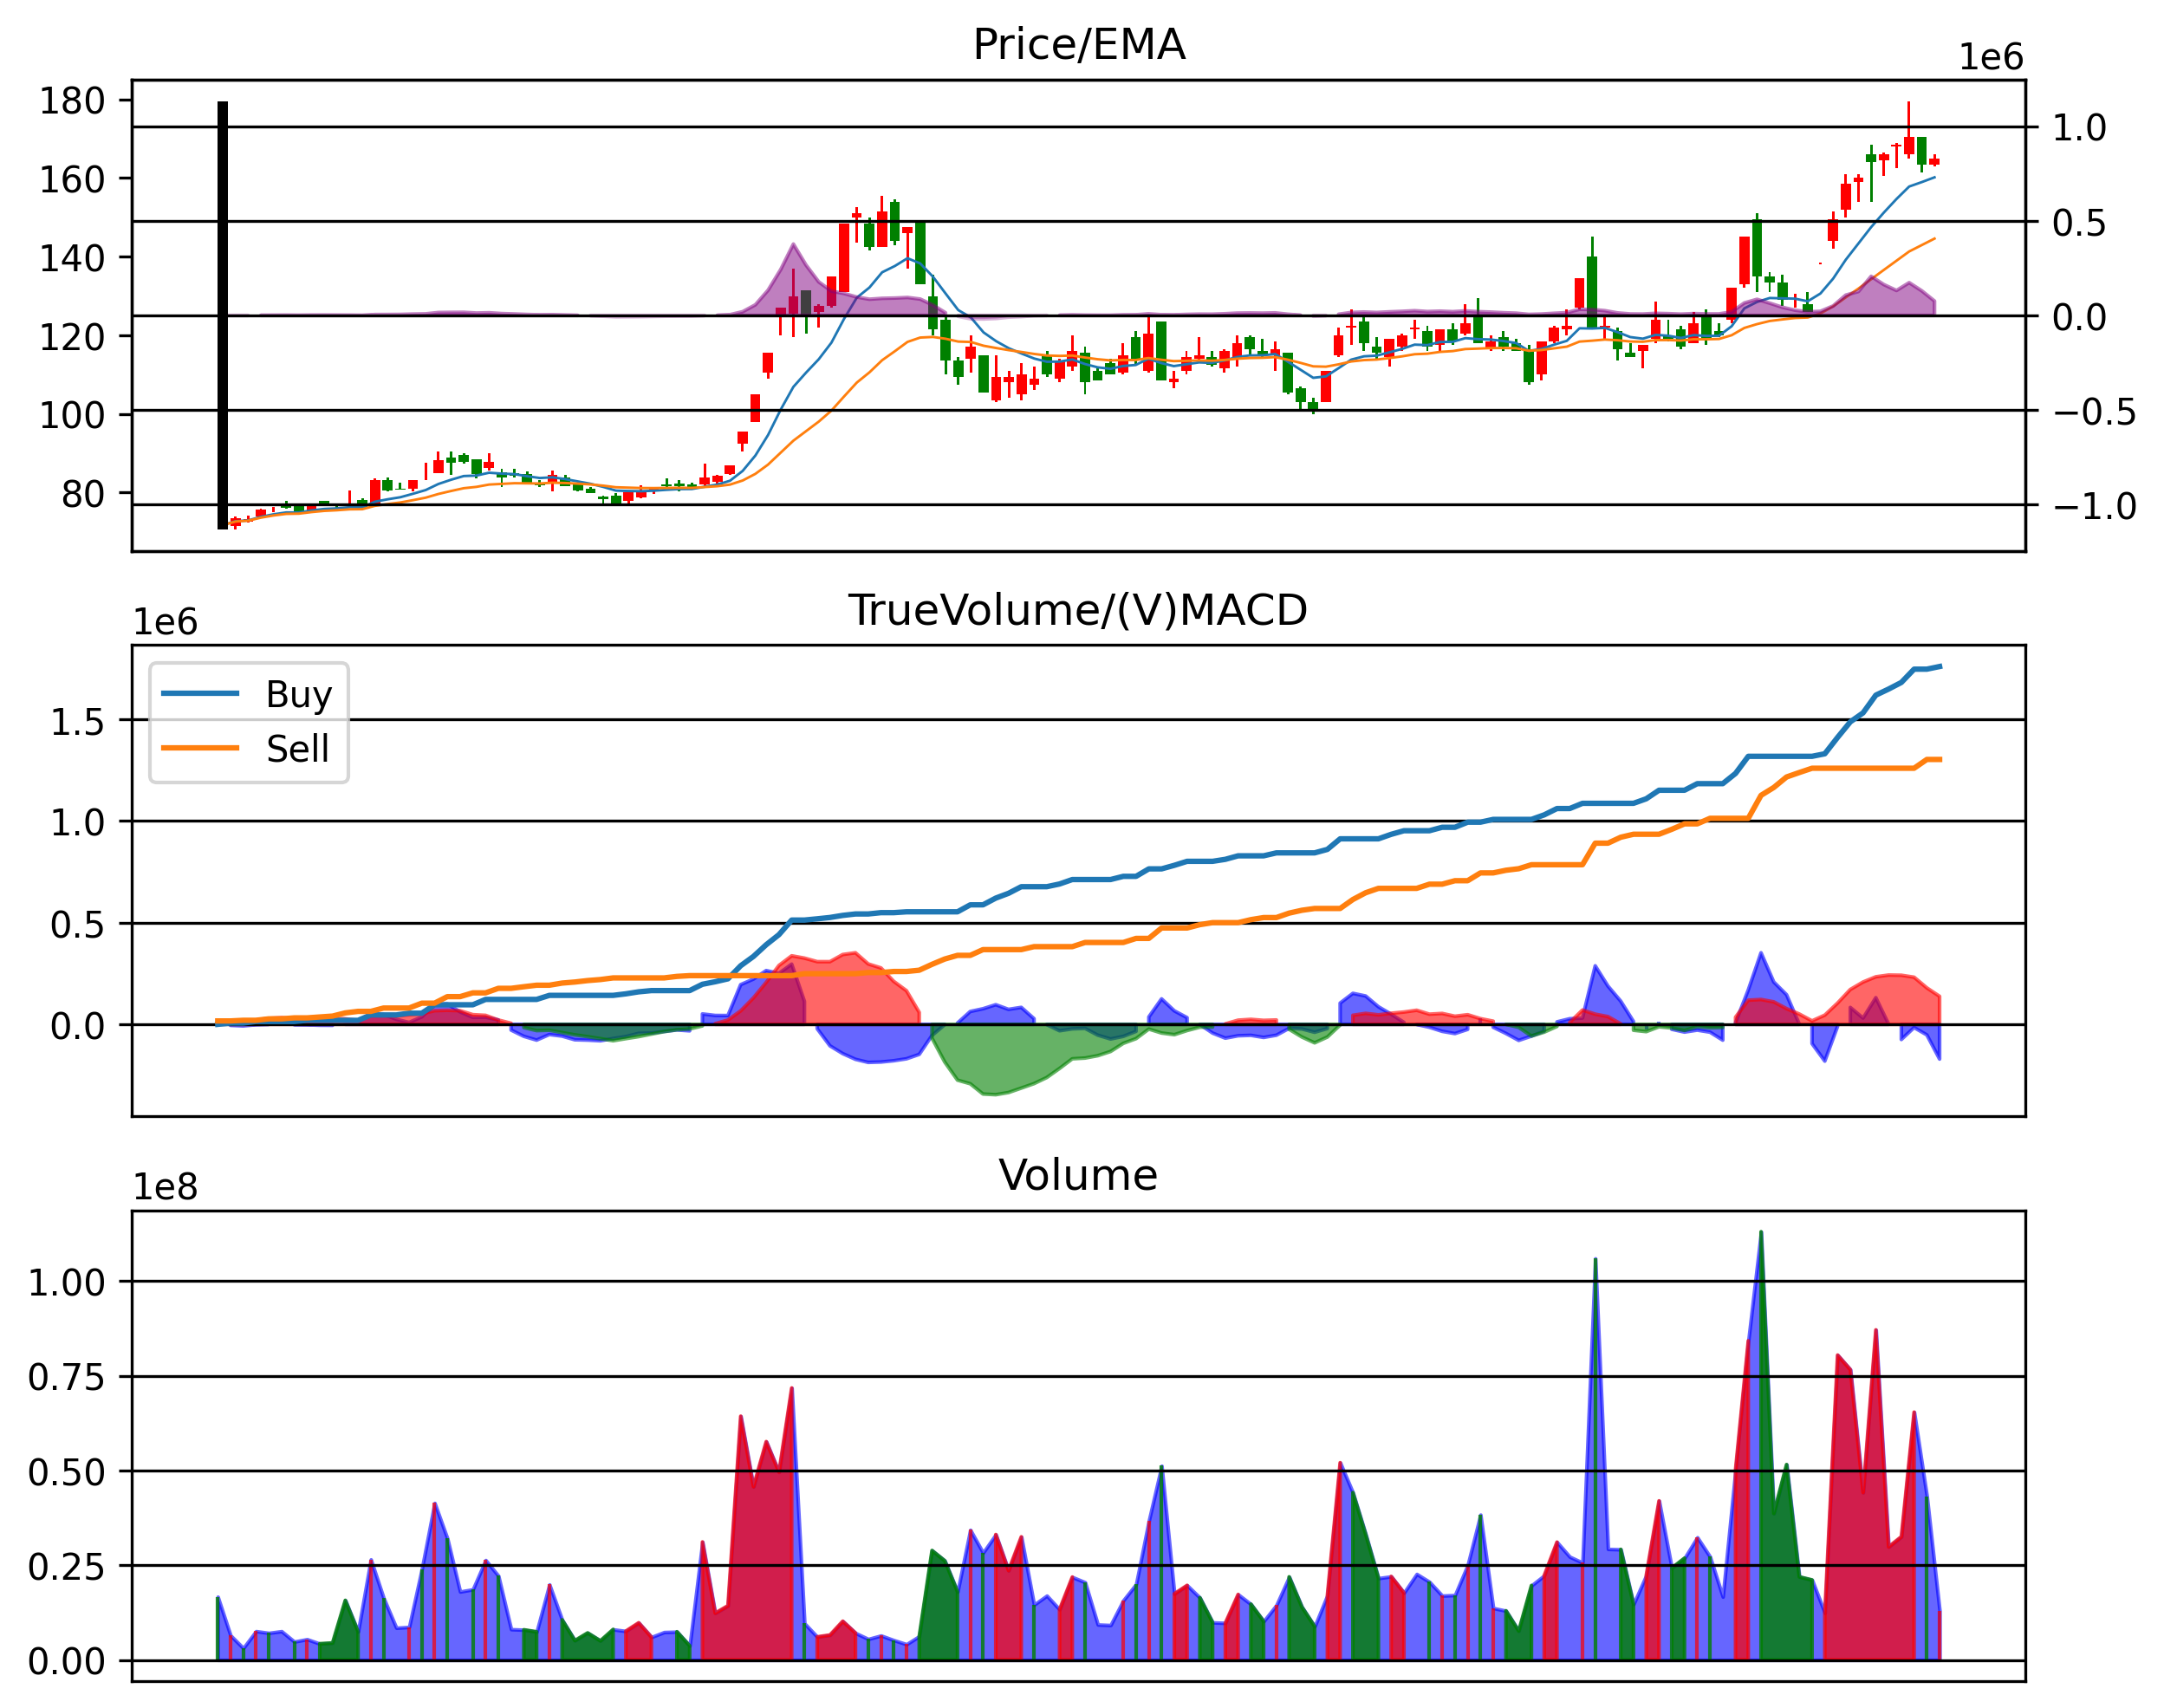

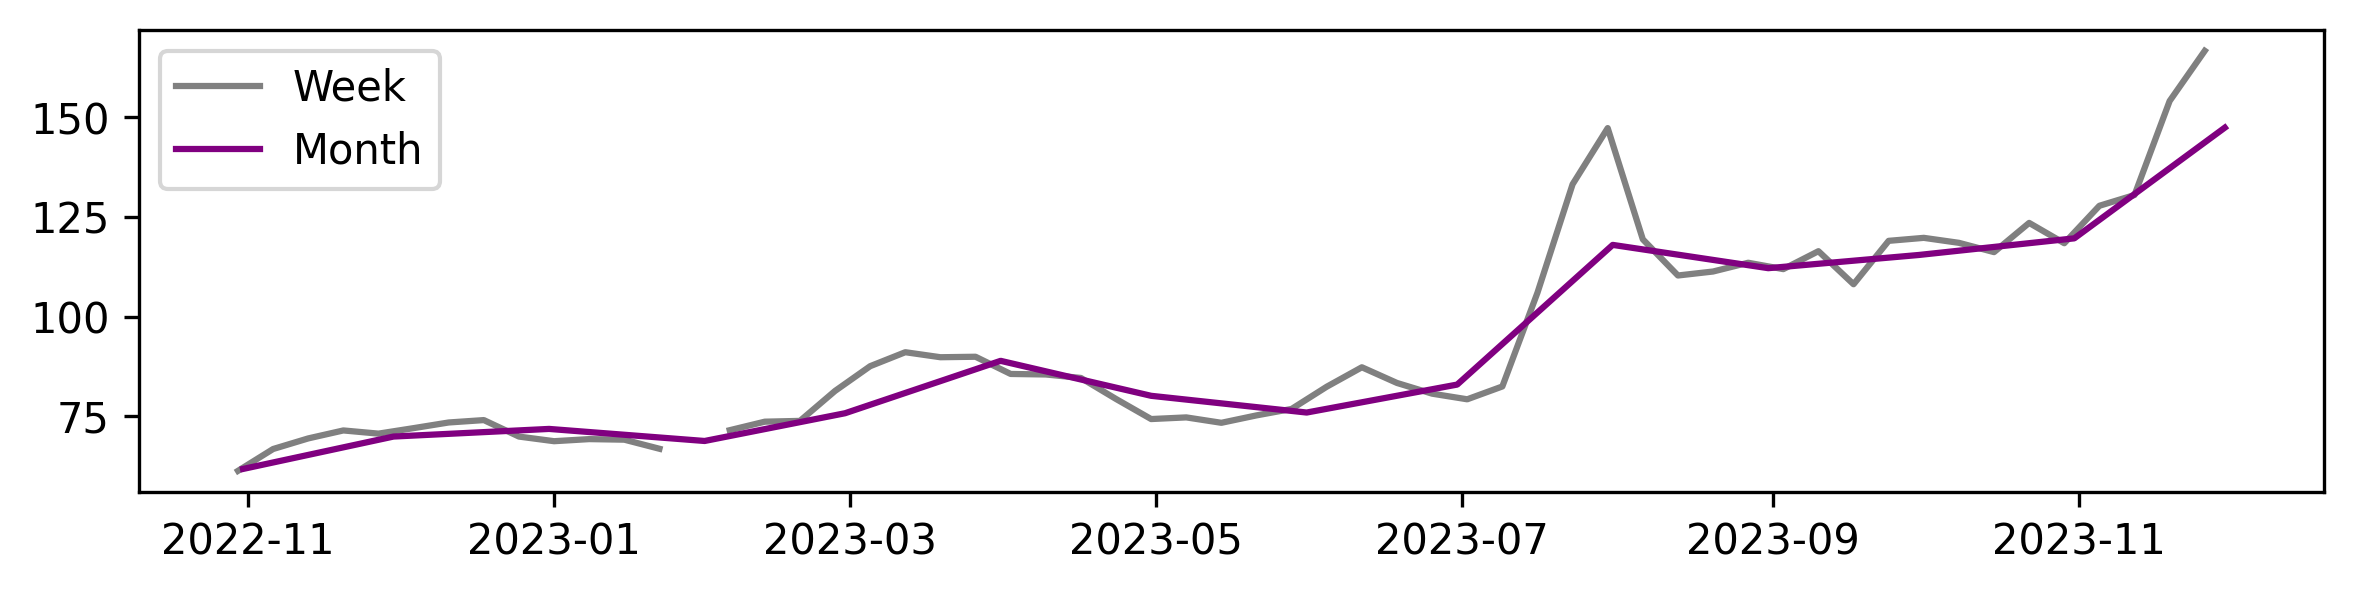

In [12]:
!pip install twstock
!twstock -U
import twstock
from twstock import Stock
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mpl
import yfinance as yf
import pandas as pd

#股票代號
stoid='威盛'

thisday = datetime.today()
day_start = thisday - timedelta(days=400)
draw_start = thisday - timedelta(days=200)
#day_start = thisday.replace(month=1, day=1)

def TrueVol(pd):
  df=pd
  global thisday
  global draw_start
  end_date = thisday
  start_date = draw_start
  df = df[df['Date'].between(start_date, end_date)]
  df = df.reset_index(drop=False)
  opp=df['Open']
  clo=df['Close']
  voo=df['Volume']
  hig=df['High']
  llo=df['Low']
  upl=[]
  dol=[]
  bll=[]
  upc=0.0
  dlc=0.0
  blc=0.0
  lp=0.0
  lgv=1.0
  lgc=0.0
  upordown=0.0
  xvo=[]
  for i in range(len(opp)):
    if clo[i]>lgc:
      lgc=clo[i]
    if(lp==0.0):
      lp=opp[i]
    upordown=0
    if(clo[i]>=opp[i]):
      if(clo[i] >= opp[i] + ((hig[i] - opp[i])/3.8) and clo[i]>=lp):
        upc+=(voo[i]/1000)
        upordown=1
      else:
        if clo[i]<lp or (clo[i] < opp[i] + ((hig[i] - opp[i])/5)):
          dlc+=(voo[i]/1000)
          upordown=-1
    else:
      if(clo[i] <= opp[i]-((opp[i]-llo[i])/3.8) and clo[i]<=lp):
        dlc+=(voo[i]/1000)
        upordown=-1
      else:
        if(clo[i] >= llo[i]+((hig[i]-llo[i])/2) and clo[i]>lp):
          upc+=(voo[i]/1000)
          upordown=1
    upl.append(upc)
    dol.append(dlc)
    blc+=voo[i]/1000
    bll.append(blc/2)
    xvo.append(upordown)
    lp=clo[i]
    if(voo[i]/1000 > lgv):
      lgv=voo[i]/1000

  ema10=clo.ewm(span=9).mean()
  ema30=clo.ewm(span=26).mean()

  Vol12     = voo.ewm(span=12).mean()
  Vol26     = voo.ewm(span=26).mean()
  Vacd      = Vol12 - Vol26
  Vsig = Vacd.ewm(span=9).mean()
  Vhistogram =Vacd-Vsig

  exp12     = clo.ewm(span=12, adjust=False).mean()
  exp26     = clo.ewm(span=26, adjust=False).mean()
  macd      = exp12 - exp26
  signal    = macd.ewm(span=9, adjust=False).mean()
  histogram = macd - signal

  gg3 = abs(max(histogram))/abs(max(Vhistogram))
  Vhistogram = Vhistogram*gg3

  gg1=max(upl[-1], dol[-1])
  bbb=0.0
  sco=[]
  x=[]
  vlv=9999/lgv
  vlc=999/lgc
  clm=2/max(abs(histogram))
  vlm=2/max(abs(Vhistogram))
  for i in range(len(upl)):
    bbb=((ema10.iloc[i]-ema30.iloc[i])*vlc*666)+((upl[i]-dol[i])*vlv/3)
    histo = abs(bbb)*clm*histogram[i]
    histo += histo*Vhistogram[i]*vlm
    if (bbb>0 and histo>0) or (bbb<0 and histo<0):
      bbb += histo
    else:
      bbb += histo*0.7

    sco.append(bbb)
    x.append(str(i))
  sco=np.array(sco)

  gg3=gg1/max(abs(Vhistogram))
  Vhistogram2 = Vhistogram*gg3/5

  gg3=gg1/max(abs(histogram))
  histogram2 = histogram*gg3/5

  mpl.rcParams["figure.figsize"] = (9.4, 8)
  mpl.rcParams["figure.dpi"] = 300

  ax1 = plt.subplot(311)
  ax2 = ax1.twinx()
  ax1.plot(ema10,linewidth=0.7)
  ax1.plot(ema30,linewidth=0.7)

  #define width of candlestick elements
  width = 0.8
  width2 = 0.2

  #define up and down prices
  up = df[df["Close"]>=df["Open"]]
  down = df[df["Close"]<df["Open"]]

  #define colors to use
  col2 = 'green'
  col1 = 'red'

  up_open=up["Open"]
  up_high=up["High"]
  up_low=up["Low"]
  up_close=up["Close"]
  #plot up prices
  ax1.bar(up.index,up_close-up_open,width,bottom=up_open,color=col1)
  ax1.bar(up.index,up_high-up_close,width2,bottom=up_close,color=col1)
  ax1.bar(up.index,up_low-up_open,width2,bottom=up_open,color=col1)

  dn_open=down["Open"]
  dn_high=down["High"]
  dn_low=down["Low"]
  dn_close=down["Close"]
  #plot down prices
  ax1.bar(down.index,dn_close-dn_open,width,bottom=dn_open,color=col2)
  ax1.bar(down.index,dn_high-dn_open,width2,bottom=dn_open,color=col2)
  ax1.bar(down.index,dn_low-dn_close,width2,bottom=dn_close,color=col2)

  #ax1.set_ylabel('EMA', color='tab:blue')
  #ax2.set_ylabel('Score', color='tab:blue')
  #ax1.plot(clo)
  ax2.fill_between(x, sco, where=(sco<0), color='purple', alpha=0.3)
  ax2.fill_between(x, sco, where=(sco>0), color='purple', alpha=0.5)
  mm = max(abs(sco))*3
  xx = [0, 0]
  h = [0-mm, mm]
  ax2.bar(xx, height=h, color='black',linewidth=0)
  plt.title('Price/EMA')
  plt.gca().xaxis.set_ticks([])
  plt.grid(color='black')

  plt.subplot(312)
  plt.plot(upl,label='Buy')
  plt.plot(dol,label='Sell')
  plt.fill_between(x, Vhistogram2, where=(Vhistogram2>0), color='blue', alpha=0.6)
  plt.fill_between(x, Vhistogram2, where=(Vhistogram2<0), color='blue', alpha=0.6)
  plt.fill_between(x, histogram2, where=(histogram2>0), color='red', alpha=0.6)
  plt.fill_between(x, histogram2, where=(histogram2<0), color='green', alpha=0.6)
  plt.gca().xaxis.set_ticks([])
  plt.grid(color='black')
  plt.legend()
  plt.title('TrueVolume/(V)MACD')

  xvo = np.array(xvo)
  plt.subplot(313)
  plt.title('Volume')
  plt.fill_between(x, voo, where=(voo>0), color='blue', alpha=0.6)
  plt.fill_between(x, voo, where=(xvo<0), color='green', alpha=0.8)
  plt.fill_between(x, voo, where=(xvo>0), color='red', alpha=0.7)
  plt.gca().xaxis.set_ticks([])
  plt.grid(color='black')

  df1 = pd.set_index('Date')
  # 計算月線EMA
  mEma12 = df1['Close'].resample('M').mean().ewm(span=12).mean()
  mEma26 = df1['Close'].resample('M').mean().ewm(span=26).mean()
  mMacd = mEma12 - mEma26
  mSignal = mMacd.ewm(span=9).mean()
  mHisto = mMacd-mSignal
  # 計算週線EMA
  wEma12 = df1['Close'].resample('W').mean().ewm(span=12).mean()
  wEma26 = df1['Close'].resample('W').mean().ewm(span=26).mean()
  wMacd = wEma12 - wEma26
  wSignal = wMacd.ewm(span=9).mean()
  wHisto = wMacd-wSignal

  MUP='-'
  if mHisto.iloc[-1]>0:
    MUP = '>0'
  WUP='-'
  if wHisto.iloc[-1]>0:
    WUP = '>0'
  DUP='-'
  if histogram.iloc[-1]>0:
    DUP = '>0'

  print('MACD 月:',MUP,'週:',WUP, '日:', DUP)

  mpl.rcParams["figure.figsize"] = (9.4, 2)
  plt.figure()
  plt.plot(df1['Close'].resample('W').mean(), color='gray', label='Week')
  plt.plot(df1['Close'].resample('M').mean(), color='purple', label='Month')
  plt.legend()

  macd_bal = histogram.iloc[-1]*0.2
  macd_bal += wHisto.iloc[-1]*0.3
  macd_bal += mHisto.iloc[-1]*0.5

  print("balanced macd:", round(macd_bal,2))

  plt.show()

def keep_first_line(text):
    lines = text.splitlines()
    if lines:
        return lines[0]
    else:
        return ""

codes = twstock.codes
df = pd.DataFrame.from_dict(codes, orient='index')

stoname=str(stoid)
if not stoname.isdigit():
  nn = df[df["name"] == stoname]
  stoid=str(int(nn.code.iloc[0]))

nn=df[df["code"]==stoid]
print(stoid, nn.name[0], nn.market[0],nn.group[0])

# 讀取股價資料
if(nn.market[0]=='上櫃'):
  print("統計起始日:"+draw_start.strftime("%Y/%m"))
  stock = Stock(stoid)
  sto_price = stock.fetch_from(day_start.year, day_start.month)
  sto_attr = ['Date', 'Volume', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change', 'Transaction']
  data1 = pd.DataFrame(columns = sto_attr, data = sto_price)
  data1 = data1.drop(['Turnover', 'Change', 'Transaction'], axis=1)

if(nn.market[0]=='上市'):
  print("統計起始日:"+draw_start.strftime("%Y/%m/%d"))
  data1 = yf.download(stoid+'.TW',start=day_start, end=thisday)
  data1 = data1.reset_index(drop=False)

is_closed = True
hour = thisday.hour+8
# 判斷現在時間是否在收盤後
if (thisday.weekday() in [5, 6]) or (hour >= 8 and hour<14):
  is_closed = False

dfl=data1.tail(1)
tt1=keep_first_line(str(dfl['Date']))
tt1=tt1[-10:]
if tt1==thisday.strftime("%Y-%m-%d"):
  realdone=True

twstock.realtime.mock = False
realdone = False
while(is_closed and realdone == False):
  data2 = twstock.realtime.get(stoid)
  if data2['success']:
    rtime=data2['info']['time']
    rtv=data2['realtime']['accumulate_trade_volume']
    ropen=data2['realtime']['open']
    rhigh=data2['realtime']['high']
    rlow=data2['realtime']['low']
    rlp=data2['realtime']['latest_trade_price']
    tt2=rtime[:10]
    if rlp != '-':
      if (tt2 != tt1):
        if(nn.market[0]=='上櫃'):
          data1.loc[len(data1)] = [datetime.strptime(tt2,"%Y-%m-%d"), int(rtv)*1000, float(ropen),float(rhigh),float(rlow),float(rlp)]
        if(nn.market[0]=='上市'):
          data1.loc[len(data1)] = [datetime.strptime(tt2,"%Y-%m-%d"), float(ropen),float(rhigh),float(rlow),float(rlp), float(rlp), int(rtv)*1000]
        print("當日資料已取得!")
    realdone = True

df=data1.tail(1)
tt1=str(df["Date"])
tt1= keep_first_line(tt1)
print(tt1[-10:])
tt1=str(round(df["Close"],2))
tt1= keep_first_line(tt1)
print(tt1[6:])

TrueVol(data1)